In this section, we will discuss how to compute the combinations and permutations using R. Consider the two following methods:
1. Generate the sample space containing all combinations by using $\textbf{paste}()$ and $\textbf{expand.grid}()$. Then compute the answer by using $\textbf{mean}()$.
2. Using functions $\textbf{combinations}(n,r)$ and $\textbf{permutations}(n,r)$ from the $\textbf{gtools}$ package.

## 1. Use $\textbf{paste}()$ and $\textbf{expand.grid}()$ to generate the sample space.

Let introduce the function $\textbf{paste}()$ to create strings by joining smaller strings. 

In [38]:
# joining strings with paste
number <- "Three"
suit <- "Hearts"
paste(number, suit)

# joining vectors element-wise with paste
paste(letters[1:5], as.character(1:5))

[1] "Three Hearts"

[1] "a 1" "b 2" "c 3" "d 4" "e 5"

The function $\textbf{expand.grid}()$ gives us all the combinations of entries of two vectors

In [39]:
expand.grid(pants = c("blue", "black"), shirt = c("white", "grey", "plaid"))

pants,shirt
<fct>,<fct>
blue,white
black,white
blue,grey
black,grey
blue,plaid
black,plaid


Now let consider the following example. We generate a deck of cards and compute the probability of drawing a King first.

In [40]:
#generate a deck of cards
suits <- c("Diamonds", "Clubs", "Hearts", "Spades")
numbers <- c("Ace", "Deuce", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King")
deck <- expand.grid(number = numbers, suit = suits)
deck <- paste(deck$number, deck$suit)

# probability of drawing a king
kings <- paste("King", suits)
mean(deck %in% kings)

[1] 0.07692308

To calculate the probability by using $\textbf{paste}()$ and $\textbf{expand.grid}()$, we need to define the two following terms:
1. the sample space generated by $\textbf{paste}()$ and $\textbf{expand.grid}()$,
2. the event. Note that the event must be a sub-string of the sample space in order to use the function $\textbf{mean}()$ for computing the probability.

## 2. The gtools package

$\textbf{permutations}(n,r)$ from the gtools package lists the different ways that r items can be selected from a set of n options when order matters.

In [41]:
library(gtools)
permutations(3,2)    # ways to choose 2 numbers in order from 1:3

1,2
1,3
2,1
2,3
3,1
3,2


Notice that the order matters here: $(3,1)$ is different than $(1,3)$. Also, note that $(1,1)$, $(2,2)$ and $(3,3)$ do not appear because once we pick a number, it can’t appear again.

Optionally, we can add a vector. If you want to see five random seven digit phone numbers out of all possible phone numbers (without repeats), you can type the following code. Note that instead of using the numbers $1$ through $10$, the default, it uses what we provided through the argument $\mathrm{v:}$ the digits $0$ through $9$.

In [42]:
all_phone_numbers <- permutations(10, 7, v = 0:9) #generate the set of seven phone numbers
n <- nrow(all_phone_numbers) #the set of indexes of all phone numbers
index <- sample(n, 5) #randomly pick 5 indexes from the set of indexes of all phone numbers
all_phone_numbers[index,] #the outcome of 5 random phone numbers

6,3,4,1,2,5,7
7,4,8,1,0,9,3
5,0,6,9,2,4,8
2,8,1,5,6,0,7
1,5,3,0,2,4,8


$\textbf{Example 1:}$ Let consider the experiment in which we draw a second card subject to the condition that a first King has been drawn. Compute the probability of drawing a second King.

In [43]:
hands <- permutations(52,2, v = deck)
first_card <- hands[,1] #get the first card from a matrix
second_card <- hands[,2] #get the second card from a matrix

sum(first_card %in% kings)
sum(first_card %in% kings & second_card %in% kings) / sum(first_card %in% kings)

[1] 204

[1] 0.05882353

An equivalent code computing the conditional probability which use the function $\textbf{mean}()$ instead of $\textbf{sum}()$ is an $\text{R}$ version of the conditional probability formula
$$\mathbb{P}(B|A) = \dfrac{\mathbb{P}(B \text{ and } A)}{\mathbb{P}(A)} $$

In [44]:
mean(first_card %in% kings & second_card %in% kings) /
mean(first_card %in% kings)

[1] 0.05882353

$\textbf{Example 2:}$ Probability of a natural 21 in blackjack

In [45]:
permutations(3,2)    # order matters
combinations(3,2)    # order does not matter

1,2
1,3
2,1
2,3
3,1
3,2


1,2
1,3
2,3


In [46]:
aces <- paste("Ace", suits)
facecard <- c("King", "Queen", "Jack", "Ten")
facecard <- expand.grid(number = facecard, suit = suits)
facecard <- paste(facecard$number, facecard$suit)

hands <- combinations(52, 2, v=deck) # all possible hands

# probability of a natural 21 given that the ace is listed first in `combinations`
mean(hands[,1] %in% aces & hands[,2] %in% facecard)

# probability of a natural 21 checking for both ace first and ace second
mean((hands[,1] %in% aces & hands[,2] %in% facecard)|(hands[,2] %in% aces & hands[,1] %in% facecard))

[1] 0.04826546

[1] 0.04826546

$\textbf{Example 3}$: The Monte-Carlo simulation of natural 21 in blackjack.

In [47]:
# code for one hand of blackjack
hand <- sample(deck, 2)
hand

# code for B=10,000 hands of blackjack
B <- 10000
results <- replicate(B, {
    hand <- sample(deck, 2)
    (hand[1] %in% aces & hand[2] %in% facecard) | (hand[2] %in% aces & hand[1] %in% facecard)
})
mean(results)

[1] "Ace Hearts"  "Nine Spades"

[1] 0.0509

## 3. Case study: The birthday problem

Suppose you are in a classroom with 50 people. If we assume this is a randomly selected group of 50 people, what is the chance that at least two people have the same birthday? 

We can compute the probability of shared birthdays in a group of people by modeling birthdays as random draws from the numbers 1 through 365. We can then use this sampling model of birthdays to run a Monte Carlo simulation to estimate the probability of shared birthdays. For simplicity, we assume nobody was born on February 29. This actually doesn’t change the answer much.

$\textbf{Checking repeated elements}$. To check if in this particular set of 50 people we have at least two with the same birthday, we can use the function $\textbf{duplicated}()$ that takes a vector and returns a vector of the same length with $\mathrm{TRUE}$ for any elements that have appeared previously in that vector.

In [48]:
duplicated(c(1,2,3,1,4,3,5))

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE

$\textbf{The Monte-Carlo Simulation}$. To estimate the probability of a shared birthday in the group, we repeat this experiment by sampling sets of 50 birthdays over and over:

In [49]:
# checking for duplicated bdays in one 50 person group
n <- 50
bdays <- sample(1:365, n, replace = TRUE)    # generate n random birthdays
any(duplicated(bdays))    # check if any birthdays are duplicated

# Monte Carlo simulation with B=10000 replicates
B <- 10000
results <- replicate(B, {    # returns vector of B logical values
    bdays <- sample(1:365, n, replace = TRUE)
    any(duplicated(bdays))
})
mean(results)    # calculates proportion of groups with duplicated bdays

[1] TRUE

[1] 0.9696

### The Function for birthday problem Monte-Carlo Simulations

In [50]:
# function to calculate probability of shared bdays across n people
compute_prob <- function(n, B = 10000) {
	same_day <- replicate(B, {
    	bdays <- sample(1:365, n, replace = TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}

n <- seq(1, 60)

Some functions automatically apply element-wise to vectors, such as $\text{sqrt}()$ and $*$. However, other functions do not operate element-wise by default. This includes functions we define ourselves.

In [51]:
x <- 1:10
sqrt(x)    # sqrt operates on each element of the vector

y <- 1:10
x*y    # * operates element-wise on both vectors

compute_prob(n)    # does not iterate over the vector n without sapply

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

[1]   1   4   9  16  25  36  49  64  81 100

[1] 0

We can use loop to apply this function to each value in $n$ but loops are rarely prefered approach in $\mathrm{R}$. The function $\textbf{sapply}(x, f)$ allows any other function $f$ to be applied element-wise to the vector $x$.

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

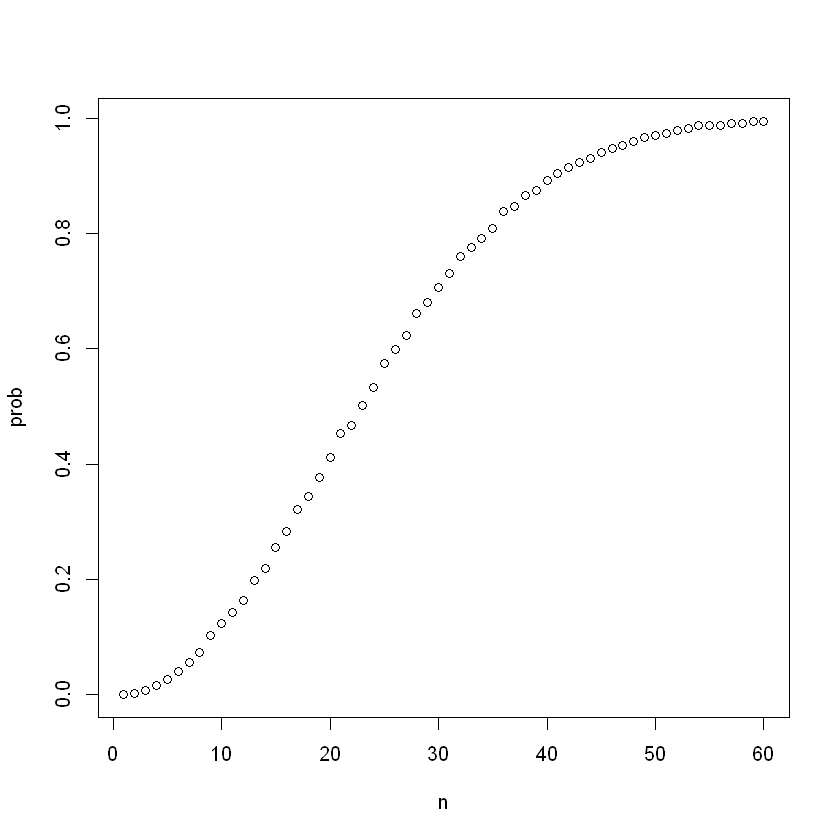

In [52]:
x <- 1:10
sapply(x, sqrt)    # this is equivalent to sqrt(x)

prob <- sapply(n, compute_prob)    # element-wise application of compute_prob to n
plot(n, prob)

Let recall the relation between the probability of an event happening and not happening
$$\mathbb{P}(A) = 1 - \mathbb{P}(\overline{A}). $$
We can compute the probability of shared birthdays mathematically
$$\mathbb{P}(\text{shared birthdays}) = 1 - \mathbb{P}(\text{no shared birthdays}) = 1 - \left( 1\times \dfrac{364}{365} \times \ldots \times \dfrac{365-n+1}{365} \right). $$

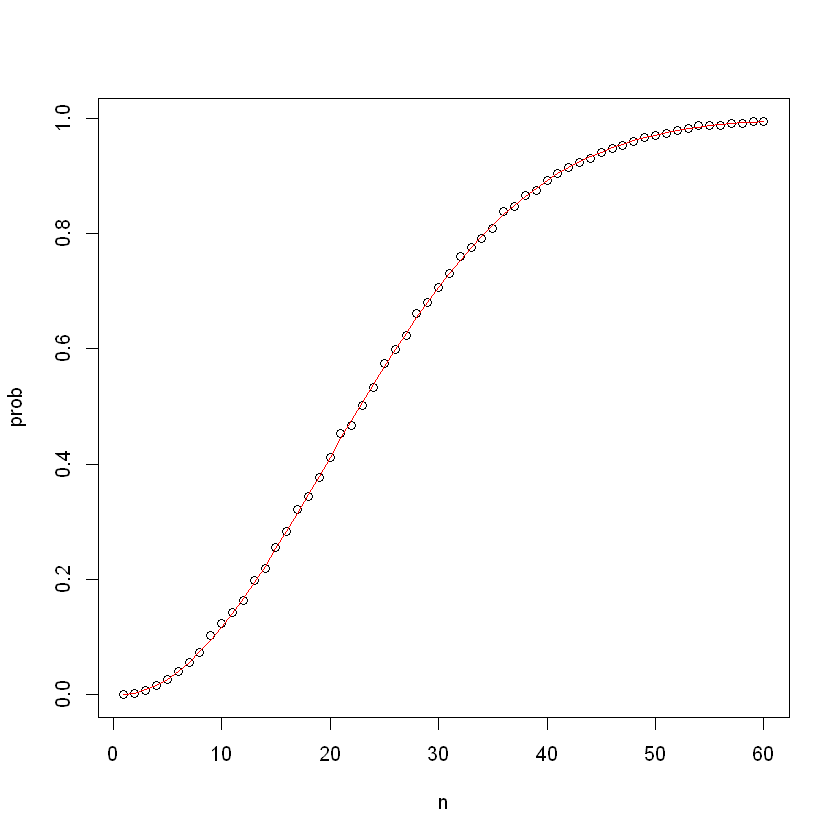

In [53]:
# function for computing exact probability of shared birthdays for any n
exact_prob <- function(n){
    prob_unique <- seq(365, 365-n+1)/365   # vector of fractions for mult. rule
    1 - prod(prob_unique)    # calculate prob of no shared birthdays and subtract from 1
}

# applying function element-wise to vector of n values
eprob <- sapply(n, exact_prob)

# plotting Monte Carlo results and exact probabilities on same graph
plot(n, prob)    # plot Monte Carlo results
lines(n, eprob, col = "red")    # add line for exact prob

This plot shows that the Monte Carlo simulation provided a very good estimate of the exact probability. Had it not been possible to compute the exact probabilities, we would have still been able to accurately estimate the probabilities.

### How many Monte Carlo experiments are enough? 

1. The larger the number of Monte Carlo replicates B, the more accurate the estimate.
2. Determining the appropriate size for B can require advanced statistics.
3. One practical approach is to try many sizes for B and look for sizes that provide stable estimates.

This code runs Monte Carlo simulations to estimate the probability of shared birthdays using several B values and plots the results. When B is large enough that the estimated probability stays stable, then we have selected a useful value of B.

In [ ]:
B <- 10^seq(1, 5, len = 100)    # defines vector of many B values
compute_prob <- function(B, n = 22){    # function to run Monte Carlo simulation with each B
	same_day <- replicate(B, {
    	bdays <- sample(1:365, n, replace = TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}

prob <- sapply(B, compute_prob)    # apply compute_prob to many values of B
plot(log10(B), prob, type = "l")    # plot a line graph of estimates 

### 4. The Monty Hall problem

In the Monty Hall problem, contestants choose one of three doors that may contain a prize. Then, one of the doors that was not chosen by the contestant and does not contain a prize is revealed. The contestant can then choose whether to stick with the original choice or switch to the remaining unopened door.

Although it may seem intuitively like the contestant has a 1 in 2 chance of winning regardless of whether they stick or switch, Monte Carlo simulations demonstrate that the actual probability of winning is 1 in 3 with the stick strategy and 2 in 3 with the switch strategy.

Monte Carlo simulations can be used to simulate random outcomes, which makes them useful when exploring ambiguous or less intuitive problems like the Monty Hall problem.

In [ ]:
B <- 10000
stick <- replicate(B, {
	doors <- as.character(1:3)
	prize <- sample(c("car","goat","goat"))    # puts prizes in random order
	prize_door <- doors[prize == "car"]    # note which door has prize
	my_pick  <- sample(doors, 1)    # note which door is chosen
	show <- sample(doors[!doors %in% c(my_pick, prize_door)],1)    # open door with no prize that isn't chosen
	stick <- my_pick    # stick with original door
	stick == prize_door    # test whether the original door has the prize
})
mean(stick)    # probability of choosing prize door when sticking

In [ ]:
switch <- replicate(B, {
	doors <- as.character(1:3)
	prize <- sample(c("car","goat","goat"))    # puts prizes in random order
	prize_door <- doors[prize == "car"]    # note which door has prize
	my_pick  <- sample(doors, 1)    # note which door is chosen first
	show <- sample(doors[!doors %in% c(my_pick, prize_door)], 1)    # open door with no prize that isn't chosen
	switch <- doors[!doors%in%c(my_pick, show)]    # switch to the door that wasn't chosen first or opened
	switch == prize_door    # test whether the switched door has the prize
})
mean(switch)    # probability of choosing prize door when switching